In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784',version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,Y = mnist['data'],mnist['target']

In [5]:
X.shape,Y.shape

((70000, 784), (70000,))

In [6]:
import matplotlib.pyplot as plt

In [7]:
some_digit=X[0]
some_digit_image = some_digit.reshape(28,28)

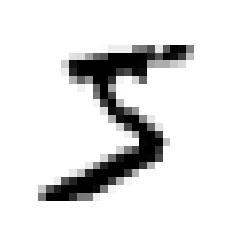

In [8]:
plt.imshow(some_digit_image,cmap='binary')
plt.axis("off")
plt.show()

In [9]:
Y[0]

'5'

In [10]:
Y = Y.astype(np.int8)

In [11]:
X_train,X_test,Y_train,Y_test = X[:60000],X[60000:],Y[:60000],Y[60000:]

### Training Binary Classifier

In [12]:
y_train_5 = (Y_train==5)
y_test_5 = (Y_test==5)

In [13]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit])

array([ True])

### Measuing Accuracy using Cross-Validation

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [19]:
skfolds = StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = np.sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

#### Confusion Matrix

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [22]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [23]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [24]:
3530/(3530+687)

0.8370879772350012

In [25]:
3530/(3530+1891)

0.6511713705958311

In [26]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

#### Precision/Recall Trade-off

In [27]:
y_scores = sgd_clf.decision_function([some_digit])

In [28]:
y_scores

array([2164.22030239])

In [29]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [30]:
y_some_digit_pred

array([ True])

In [31]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [32]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

In [46]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.legend(loc="upper right")
    plt.grid()

In [48]:
plt.rcParams["figure.figsize"] = (20,7)
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [43]:
#precisions[:-1],recalls.shape

In [49]:
plt.plot(recalls[:-1],precisions[:-1])
plt.xlabel("Recall")
plt.ylabel("Precision")

Text(0, 0.5, 'Precision')

In [50]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [51]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [52]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

#### ROC Curve

In [53]:
from sklearn.metrics import roc_curve

In [54]:
fpr ,tpr,thresholds = roc_curve(y_train_5,y_scores)

In [55]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()

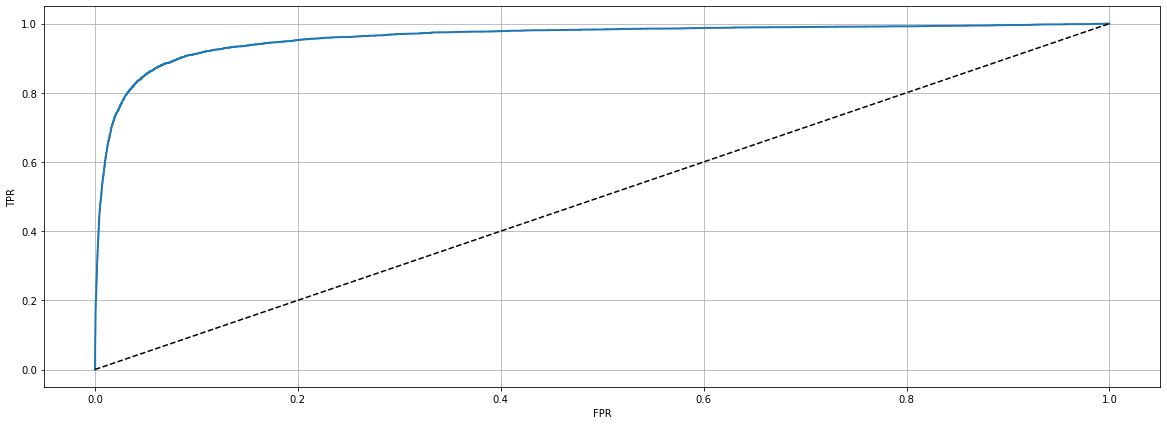

In [56]:
plot_roc_curve(fpr,tpr)

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [58]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [61]:
y_scores_forest = y_probas_forest[:,1] #score = proba of positive calss
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [62]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random forest")
plt.legend(loc="lower right")

In [63]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [70]:
y_train_pred_forest = y_scores_forest>=0.5

In [72]:
precision_score(y_train_5,y_train_pred_forest)

0.9897468089558485

In [73]:
recall_score(y_train_5,y_train_pred_forest)

0.8725327430363402

## Multiclass Classification

In [14]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,Y_train)
svm_clf.predict([some_digit])

array([5], dtype=int8)

In [15]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [17]:
np.argmax(some_digit_scores)

5

In [18]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [19]:
svm_clf.classes_[5]

5

In [20]:
from sklearn.multiclass import OneVsRestClassifier
ovr_cls = OneVsRestClassifier(SVC())
ovr_cls.fit(X_train,Y_train)

OneVsRestClassifier(estimator=SVC())

In [ ]:
ovr_clf.predi